# Project description
---
**Context**

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.


Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

In this project, we will:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:- 
- Identify target groups
- Suggest measures to cut churn

In this project we will:

- Review the dataset to check if there are any missing values that should be addressed before the analysis
- Exploring the data distribution by churn/stay groups 
- Analyze correlations between the features with the target feature- churn
- Build a model to predict customer churn.
- Train the clustering model with the K-means algorithm and do the predictions and examine the distributions of features for the cluster
- Calculate churn rates

# Table of Contents

---
**Step 1. Download the data and prepare it for analysis**
    
    
   
**Step 2. Exploratory data analysis (EDA)**

- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the `describe()` method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the `groupby()` method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.



**Step 3. Build a model to predict user churn** 

- Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the `train_test_split()` function.
- Train the model on the train set with two methods:
    - logistic regression
    - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
- Remember to indicate the `random_state` parameter when dividing data and defining the algorithm.


**Step 4. Create user clusters**

Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the `linkage()` function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster (use the `groupby()` method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

- Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

**Step 5. Come up with conclusions and basic recommendations on working with customers**

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.


You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

# Description of the data
---


Model Fitness provided with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:

- `Churn` — the fact of churn for the month in question
- Current dataset fields:
    - User data for the preceding month
    - `gender`
    - `Near_Location` — whether the user lives or works in the neighborhood where the gym is located
    - `Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
    - `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
    - `Phone` — whether the user provided their phone number
    - `Age`
    - `Lifetime` — the time (in months) since the customer first came to the gym


- Data from the log of visits and purchases and data on current membership status
    - `Contract_period` — 1 month, 3 months, 6 months, or 1 year
    - `Month_to_end_contract` — the months remaining until the contract expires
    - `Group_visits` — whether the user takes part in group sessions
    `Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime
    - `Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month
    - `Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Step 1. Download the data and prepare it for analysis
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score



In [3]:
try:
    gym_data = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 9/gym_churn_us.csv')
except:
    gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
gym_data.info('deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_data.describe(include='all').T

count        mean        std        min  \
gender                             4000.0    0.510250   0.499957   0.000000   
Near_Location                      4000.0    0.845250   0.361711   0.000000   
Partner                            4000.0    0.486750   0.499887   0.000000   
Promo_friends                      4000.0    0.308500   0.461932   0.000000   
Phone                              4000.0    0.903500   0.295313   0.000000   
Contract_period                    4000.0    4.681250   4.549706   1.000000   
Group_visits                       4000.0    0.412250   0.492301   0.000000   
Age                                4000.0   29.184250   3.258367  18.000000   
Avg_additional_charges_total       4000.0  146.943728  96.355602   0.148205   
Month_to_end_contract              4000.0    4.322750   4.191297   1.000000   
Lifetime                           4000.0    3.724750   3.749267   0.000000   
Avg_class_frequency_total          4000.0    1.879020   0.972245   0.000000   
Avg_class_frequency_current_month  4000.0    1.767052   1.052906   0.000000   
Churn                              4000.0    0.265250   0.441521   0.000000   

                                         25%         50%         75%  \
gender                              0.000000    1.000000    1.000000   
Near_Location                       1.000000    1.000000    1.000000   
Partner                             0.000000    0.000000    1.000000   
Promo_friends                       0.000000    0.000000    1.000000   
Phone                               1.000000    1.000000    1.000000   
Contract_period                     1.000000    1.000000    6.000000   
Group_visits                        0.000000    0.000000    1.000000   
Age                                27.000000   29.000000   31.000000   
Avg_additional_charges_total       68.868830  136.220159  210.949625   
Month_to_end_contract               1.000000    1.000000    6.000000   
Lifetime                            1.000000    3.000000    5.000000   
Avg_class_frequency_total           1.180875    1.832768    2.536078   
Avg_class_frequency_current_month   0.963003    1.719574    2.510336   
Churn                               0.000000    0.000000    1.000000   

                                          max  
gender                               1.000000  
Near_Location                        1.000000  
Partner                              1.000000  
Promo_friends                        1.000000  
Phone                                1.000000  
Contract_period                     12.000000  
Group_visits                         1.000000  
Age                                 41.000000  
Avg_additional_charges_total       552.590740  
Month_to_end_contract               12.000000  
Lifetime                            31.000000  
Avg_class_frequency_total            6.023668  
Avg_class_frequency_current_month    6.146783  
Churn                                1.000000

In [6]:
gym_data.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

<span style="color:green">**Notes from the analyst:** </span> 

- We are working with a dataset of 4000 values in 14 columns
- We do not see any missing values and there's no need to change any datatypes
- Standard deviation of each column does not go far from the mean, so we can understand there are not any noticeable anomalies in our dataset

### Change column name to lowercase

In [7]:
gym_data.columns= gym_data.columns.str.lower()

In [8]:
gym_data.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

### Duplicated values

In [9]:
gym_data.duplicated().sum()

0

<h3 style="color:orange">Conlcusions:</h3> 

On this section of preprocessing the data we did:

- Changed column names to lowercase for easier usage. We also checked duplicates but we found none. No further preprocessing is needed in this dataset

## Step 2.  Exploratory data analysis (EDA)
---

### Customer Features for Churn/Stay Customer

In [10]:
gym_data.groupby('churn').mean().T

churn                                       0           1
gender                               0.510037    0.510839
near_location                        0.873086    0.768143
partner                              0.534195    0.355325
promo_friends                        0.353522    0.183789
phone                                0.903709    0.902922
contract_period                      5.747193    1.728558
group_visits                         0.464103    0.268615
age                                 29.976523   26.989632
avg_additional_charges_total       158.445715  115.082899
month_to_end_contract                5.283089    1.662582
lifetime                             4.711807    0.990575
avg_class_frequency_total            2.024876    1.474995
avg_class_frequency_current_month    2.027882    1.044546

<span style="color:green">**Notes from the analyst:** </span> 

In the table above we show the differnt features per group of customers: those who churn(1) and those who stayed (0). We noted: 

- Gender affects almost equally on churn/stay
- If users are near the location of the gym, they are more likely to stay, which is expected, even though the difference is very low
- Customers from a partner company or those who joined via BFF (best friends), are more likely to stay
- Customers attendigng classes are more likely to stay than those who don't
- Customers are less likely to churn if they still have time in their contract, as cancel before might carry fees



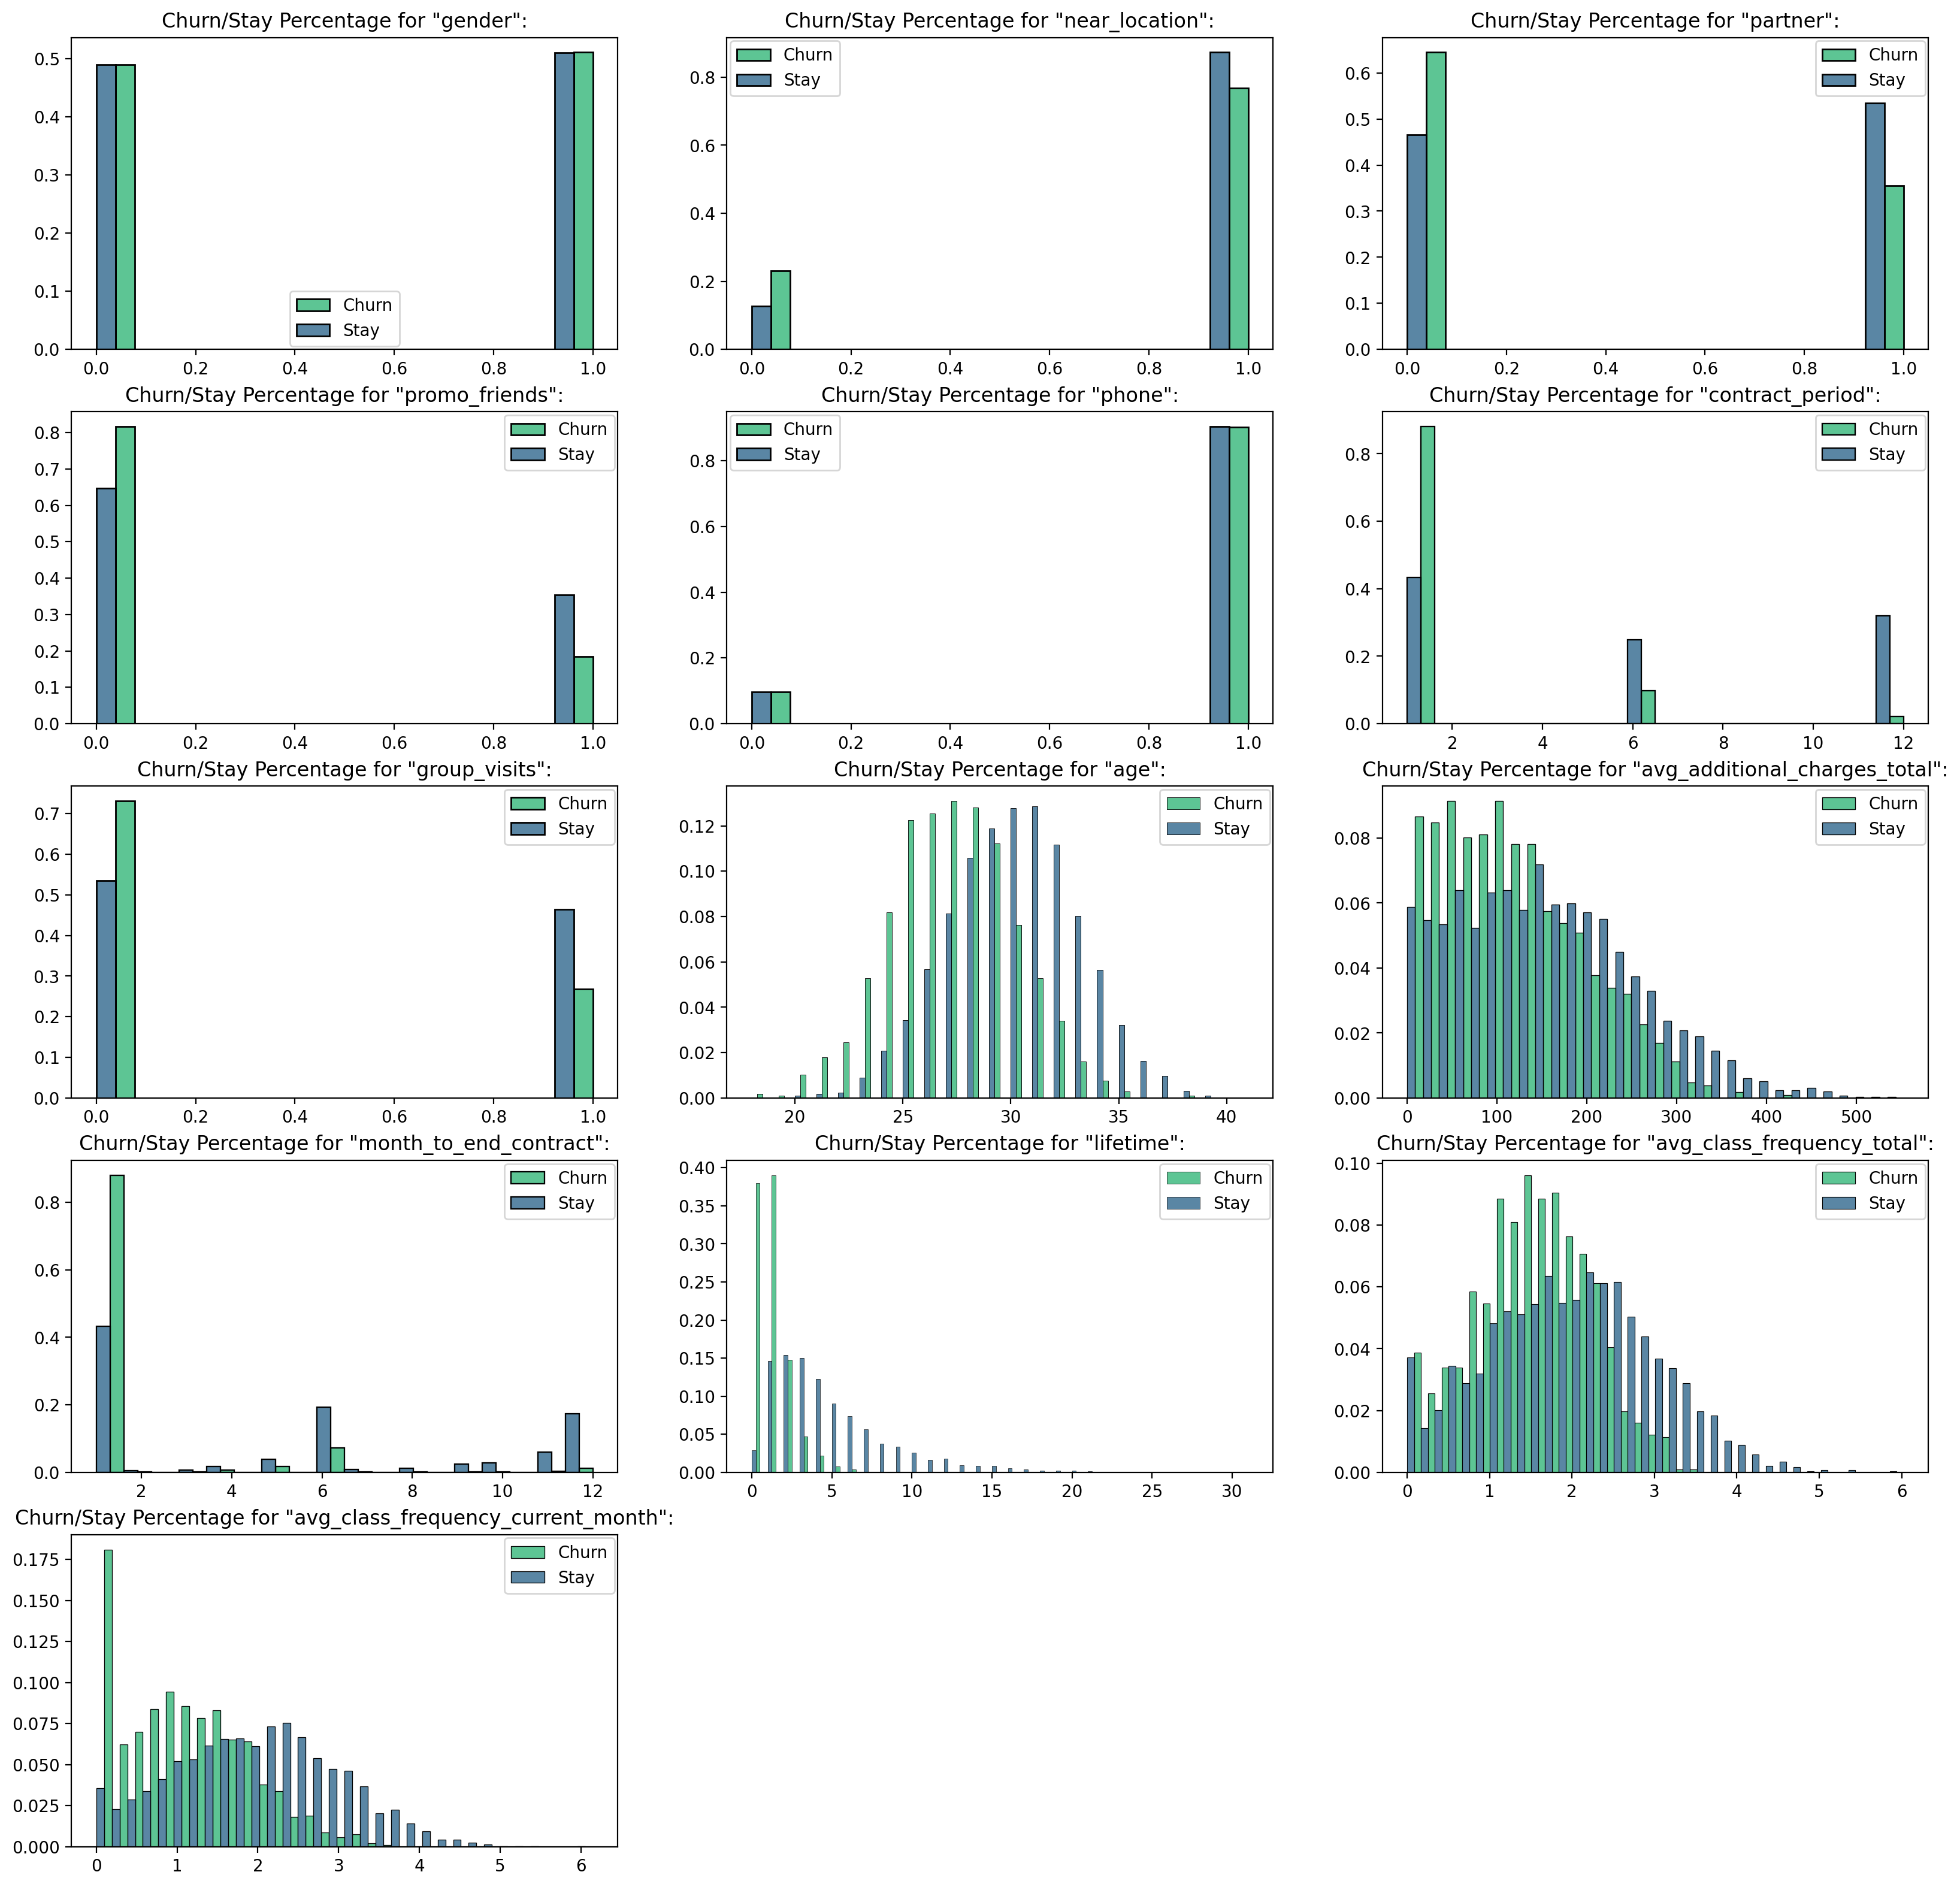

In [11]:
row, column = 5,3
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(20, 20), dpi=200)
columns = ["gender", "near_location", "partner", "promo_friends", "phone", "contract_period", 
           "group_visits", "age", "avg_additional_charges_total", "month_to_end_contract", "lifetime", 
           "avg_class_frequency_total", "avg_class_frequency_current_month"]
for col in columns:
    ax = plt.subplot2grid((row, column), (x_i, y_i))
    sns.set_palette('viridis', 2)
    ax = sns.histplot(data=gym_data, x=col, hue='churn', stat="probability", common_norm=False, multiple="dodge", alpha=0.8)
    plt.legend(loc='best', borderaxespad=0.2, labels=["Churn","Stay"])
    ax.set(xlabel=None, ylabel=None, title='Churn/Stay Percentage for "{}":'.format(col))
    y_i += 1
    if y_i == column: 
        x_i += 1
        y_i = 0

<span style="color:green">**Notes from the analyst:** </span> 

After pltotting the histograms, we confirm what we saw in the table above: 

- Live near the gym has more % of satying
- Customers from partner companies also stay more than those who don't
- If they came to they gym through best friend referral, then is more likely they stay
- The longer the contract period, the better. Users with 1 month has much more chance to churn. Maybe they tried for a trial of 1 month and then decided not to continue
- Those attending group sessoions are more likely to staty, as they engage more with the gym and the people
- Younger people have a higher churn % than older ones, as younger people might move more or find other promotions, while older people are more likely to stick to routines and same places
- The higher the aditional charges, the lower is the churn rate
- Customers with higher number of months left are more likely to stay
- When customers are more active, they churn less

### Distribution of Non-Binary Features

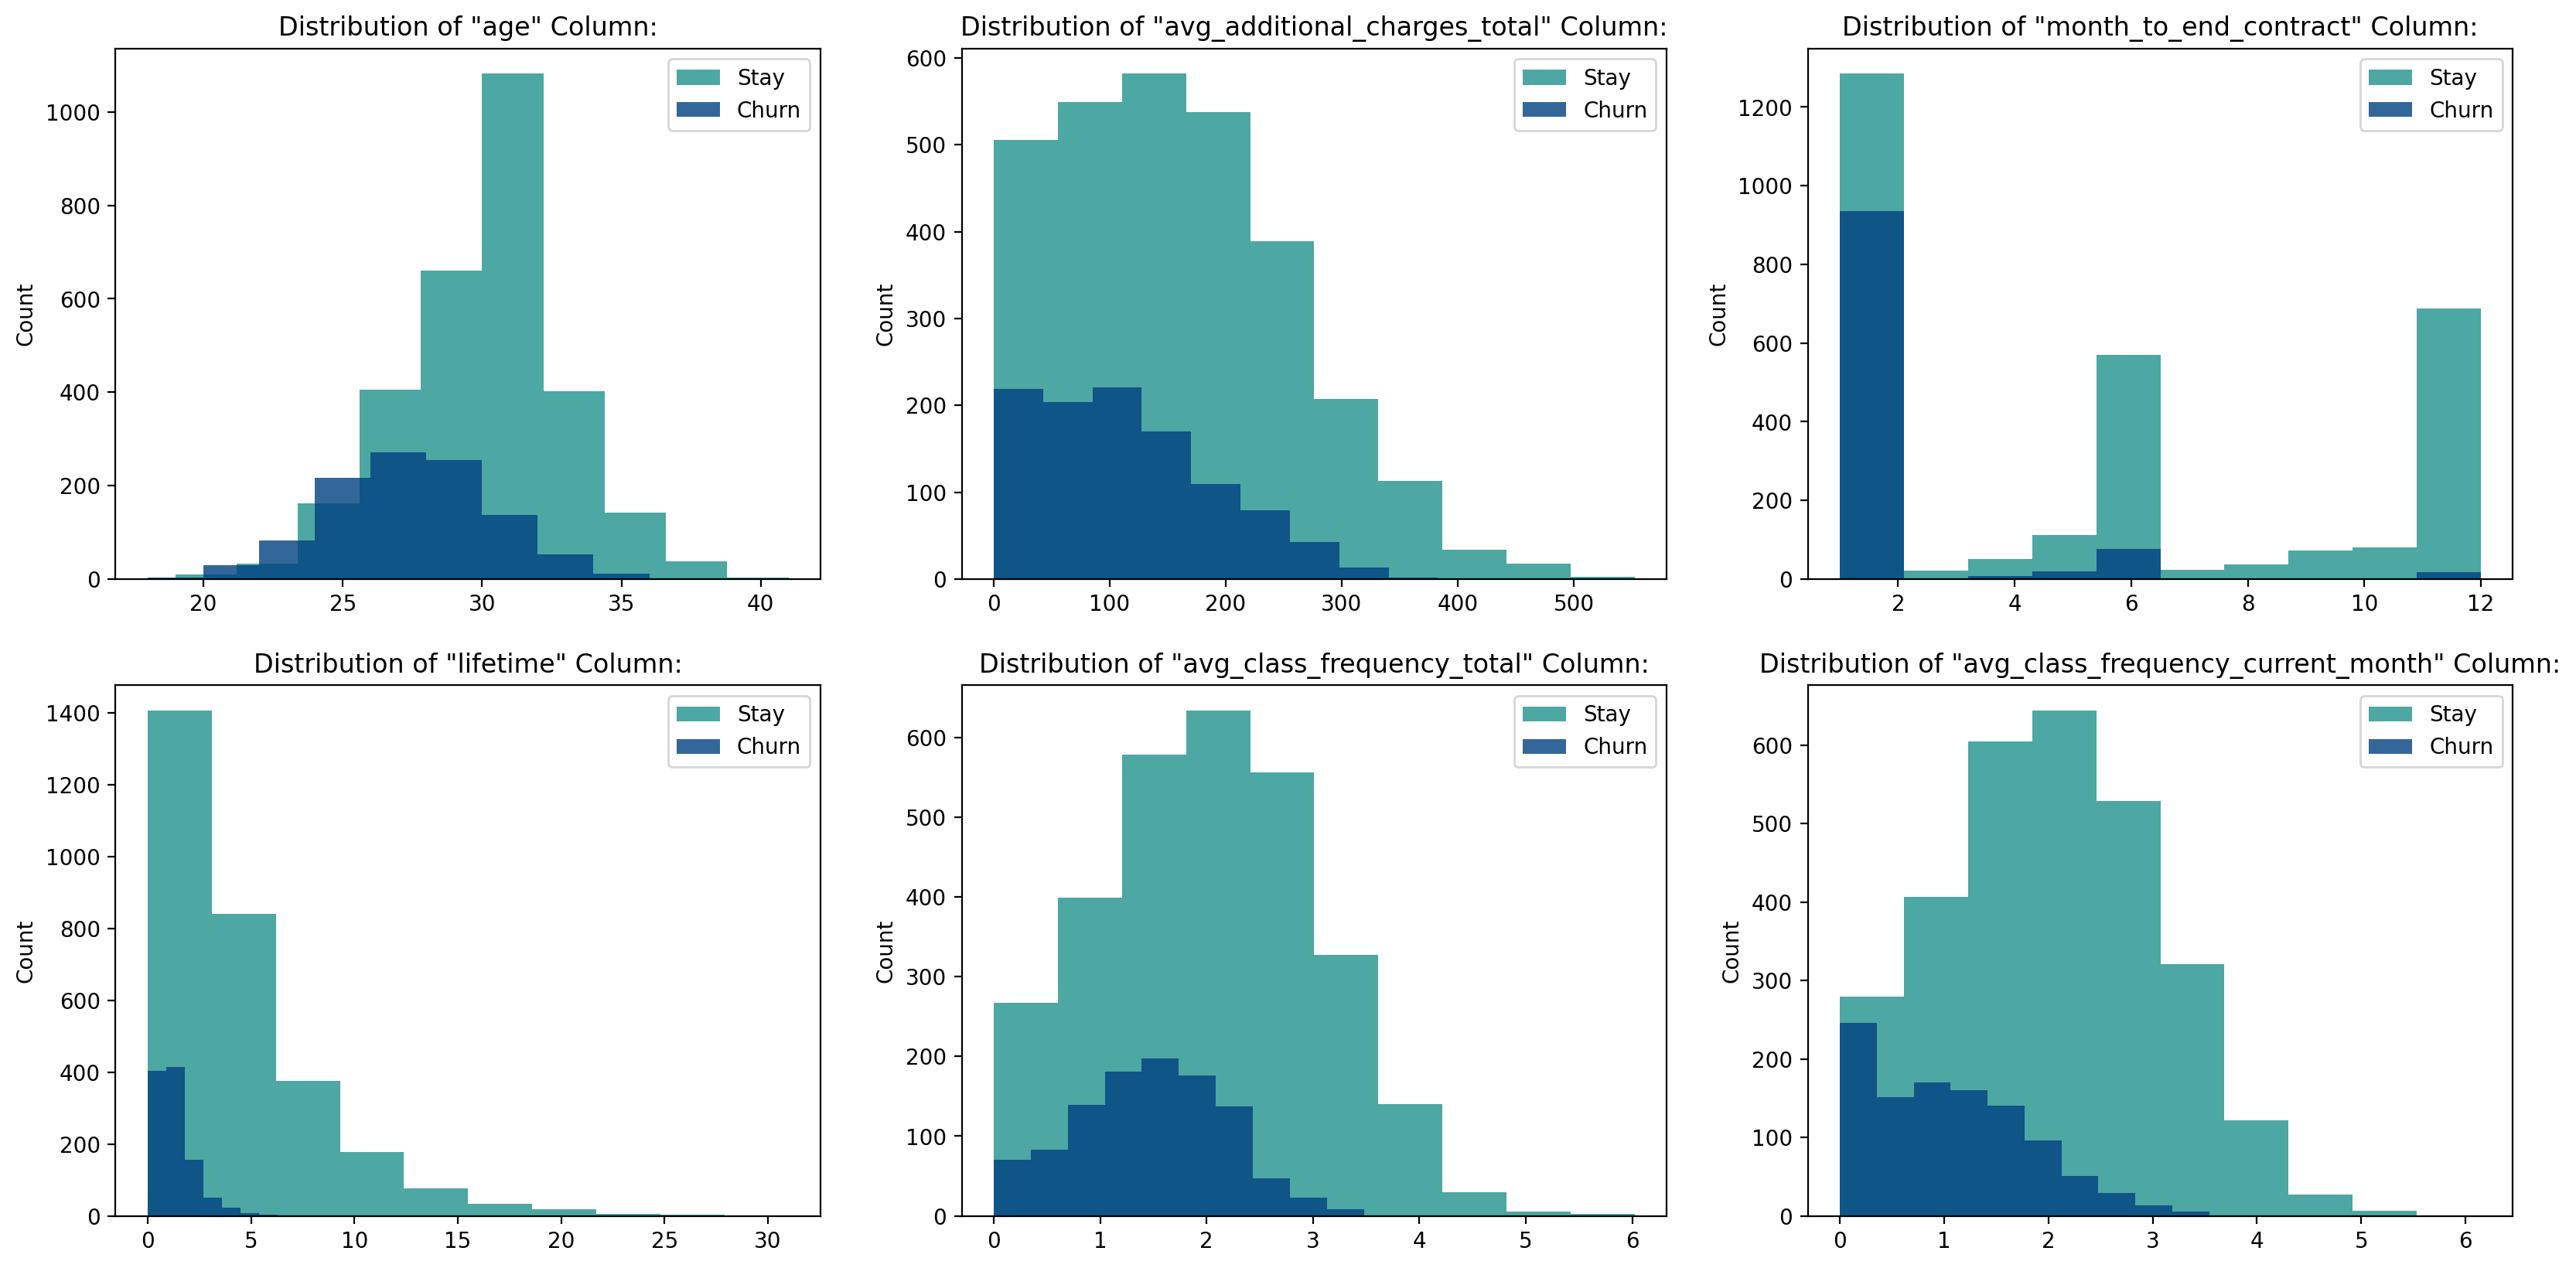

In [12]:
row, column = 2,3
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(20, 10), dpi=200)
columns = gym_data[["age", "avg_additional_charges_total", "month_to_end_contract", "lifetime", 
           "avg_class_frequency_total", "avg_class_frequency_current_month"]]
for col in columns:
    ax = plt.subplot2grid((row, column), (x_i, y_i))
    ax = plt.hist(gym_data.query('churn == 0')[col], bins=10, alpha = 0.8, edgecolor = "none", color=sns.color_palette('viridis', 1))
    ax = plt.hist(gym_data.query('churn == 1')[col], bins=10, alpha = 0.8, edgecolor = "none", color=sns.color_palette('ocean', 1))
    plt.ylabel('Count')
    plt.title('Distribution of "{}" Column:'.format(col))
    plt.legend(['Stay', 'Churn'])
    y_i += 1
    if y_i == column: 
        x_i += 1
        y_i = 0

<span style="color:green">**Notes from the analyst:** </span> 

- From the histograms above we do not find any significant anomalies in the data

### Features' Correlation

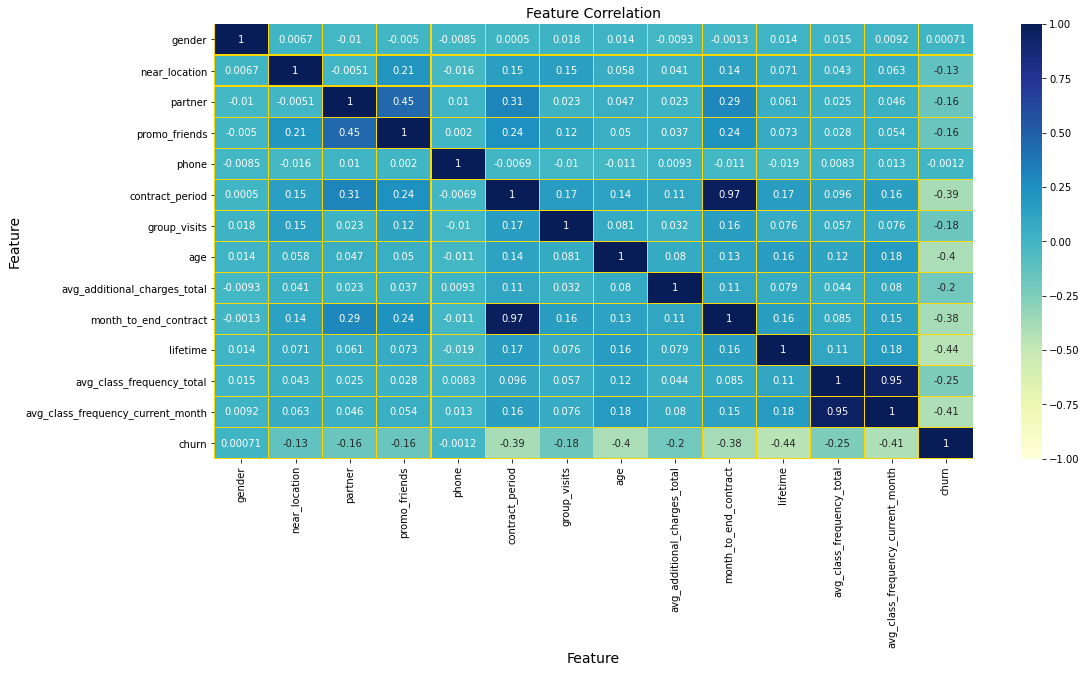

In [13]:
plt.figure(figsize=(17, 8))
plt.title('Feature Correlation', size=14)
sns.heatmap(gym_data.corr(),annot=True,linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=-1, vmax=1)
plt.xlabel("Feature", size=14) 
plt.ylabel("Feature", size=14) 
plt.show()

<span style="color:green">**Notes from the analyst:** </span> 

The highest correlation is between customers' `avg_class_frequency_total` activity and their `avg_class_frequency_current_month` activity.

The highest correlation weather customers churn or stay are:

- `lifetime`
- `avg_class_frecuency_current_month`
- `age`
- `contract_period`
- `month_to_end_contract`

No correlation noticeable around gender. 

## Step 3. Build a model to predict user churn
---

In [14]:
#dividing gym_data between features (X) and target variable (Y)
X = gym_data.drop('churn', axis = 1)
y = gym_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#function to calculate and print each model's metrics

def matrics_predictions(y_true, y_pred):
    print("Accuracy: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1: {:.2f}"
                .format(accuracy_score(y_true, y_pred), precision_score (y_true, y_pred), 
                       recall_score (y_true, y_pred), f1_score (y_true, y_pred)))

In [16]:
models= [LogisticRegression(random_state= 0), DecisionTreeClassifier(random_state= 0),
         RandomForestClassifier(random_state= 0), GradientBoostingClassifier(random_state= 0)]

for m in models:
    print('{} Model:'.format(m))
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrics_predictions(y_test, y_pred)

LogisticRegression(random_state=0) Model:
Accuracy: 0.92 
Precision: 0.87 
Recall: 0.81 
F1: 0.84
DecisionTreeClassifier(random_state=0) Model:
Accuracy: 0.90 
Precision: 0.79 
Recall: 0.80 
F1: 0.80
RandomForestClassifier(random_state=0) Model:
Accuracy: 0.92 
Precision: 0.84 
Recall: 0.82 
F1: 0.83
GradientBoostingClassifier(random_state=0) Model:
Accuracy: 0.93 
Precision: 0.88 
Recall: 0.84 
F1: 0.86


<span style="color:green">**Notes from the analyst:** </span> 

Four models selected: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier. 

- All metrics are above 80% (with exception of the  DecisionTreeClassifier model). This means that the models made the right predictions.
- Accuracy of >90%

- Model GradientBoostingClassifier has the highest metrics of all four models.

In [17]:
final_model = GradientBoostingClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
importances = final_model.feature_importances_
importances_df = pd.DataFrame(importances)

In [18]:
feature_df = gym_data.T.reset_index()
feature_df.drop(feature_df.loc[:, 0:3999], axis = 1, inplace = True)
feature_df = feature_df.join(importances_df).rename(columns=
            {'index':'Feature', 0: 'Importance'}).sort_values(by = 'Importance', 
                                                              ascending=False).fillna('Target Feature')
feature_df

Feature      Importance
10                           lifetime        0.475401
12  avg_class_frequency_current_month        0.166446
11          avg_class_frequency_total        0.107454
7                                 age        0.091506
5                     contract_period        0.062262
9               month_to_end_contract        0.062205
8        avg_additional_charges_total        0.026963
6                        group_visits        0.005443
3                       promo_friends        0.001887
1                       near_location        0.000316
4                               phone        0.000117
0                              gender             0.0
2                             partner             0.0
13                              churn  Target Feature

<h3 style="color:orange">Conlcusions:</h3> 

On this section we conclude:

- `lifetime`, `avg_class_frequency_current_month`, `age`, `contract_period` and `month_to_end_contract` had the highest correlation with the feature target - churn.
- Using the best performing model (**GradientBoostingClassifier**), we can see that four of these features are in top 5, along with `avg_class_frequency_total` in third. 
- `lifetime` is by far the most important feature and customer's attendance in the previous month.

## Step 4. Create user clusters
---

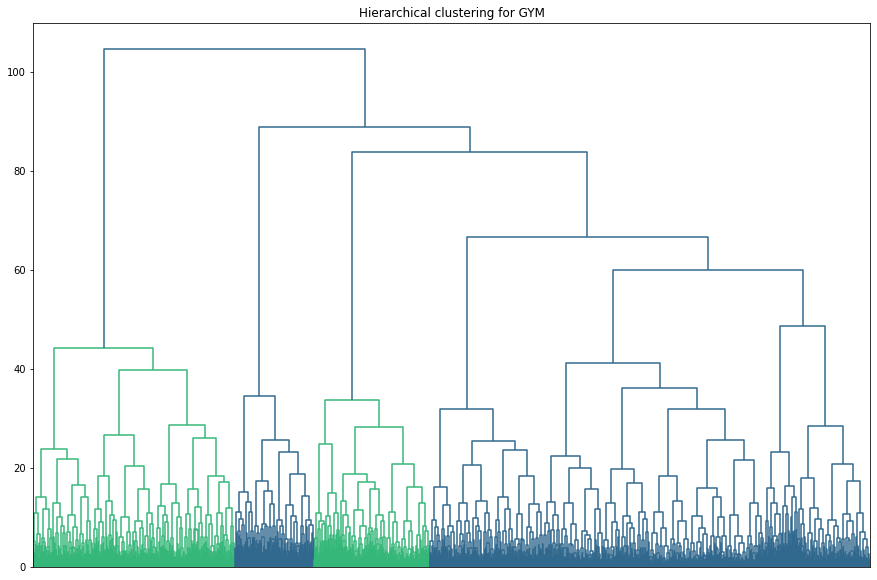

In [19]:
X = gym_data.drop(columns='churn')
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))
plt.gca().axes.get_xaxis().set_visible(False)
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

In [20]:
#defined K-means model with 5 clusters
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [21]:
gym_data['cluster'] = labels
gym_data.groupby('cluster', as_index=False).mean()

cluster    gender  near_location   partner  promo_friends     phone  \
0        0  0.502970       0.959406  0.783168       0.574257  1.000000   
1        1  0.522078       0.862338  0.470130       0.306494  0.000000   
2        2  0.495050       0.000000  0.463366       0.079208  1.000000   
3        3  0.485737       1.000000  0.350238       0.240095  1.000000   
4        4  0.559666       0.976134  0.356802       0.230310  0.998807   

   contract_period  group_visits        age  avg_additional_charges_total  \
0        10.889109      0.542574  29.982178                    160.761016   
1         4.787013      0.425974  29.301299                    143.957664   
2         2.352475      0.215842  28.477228                    135.457501   
3         1.948494      0.341521  28.167987                    131.622204   
4         2.669451      0.473747  30.125298                    161.657905   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               9.954455  4.736634                   1.982055   
1               4.475325  3.924675                   1.847220   
2               2.198020  2.809901                   1.660461   
3               1.856577  2.440571                   1.247634   
4               2.459427  4.898568                   2.852002   

   avg_class_frequency_current_month     churn  
0                           1.974789  0.027723  
1                           1.716369  0.267532  
2                           1.477324  0.443564  
3                           1.012983  0.514263  
4                           2.850161  0.068019

In [22]:
fig = px.bar(gym_data.groupby('cluster', as_index=False).mean().sort_values(by='cluster', ascending=False),
             y='churn', x='cluster', color_discrete_sequence=(px.colors.sequential.Magma, 5),
             title='Mean Churn Values per Cluster')
fig.update_layout(legend=dict(title='Cluster Number'))
fig.show()

<span style="color:green">**Notes from the analyst:** </span> 

- Cluster 0 has the lowest churn rate with 2%
- Cluster 4 in second place with the lowest rate at 6%
- Clusters 1,2 & 3 have the highest with 26%, 44% and 51%, respectively

In [23]:
non_bi=['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age', 'month_to_end_contract']
for f in non_bi:
    fig = px.bar(gym_data.groupby('cluster', as_index=False).mean(), 
             x='cluster', y=f, color_discrete_sequence=(px.colors.sequential.Magma, 6), barmode='group')
    fig.update_layout(width=1000, height=500,title='Mean of "{}"'.format(f),
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Average of "{}"'.format(f),
        titlefont_size=12,
        tickfont_size=12), xaxis=dict(
        title="Cluster Number",
        titlefont_size=12,
        tickfont_size=12), legend=dict(title='Cluster Number'))
    fig.show()
    
    fig = px.histogram(gym_data, 
             x=f, histfunc="count", color="cluster", color_discrete_sequence=(px.colors.sequential.YlGnBu))
    fig.update_layout(width=1000, height=500,title='"{}" per Cluster'.format(f),
                      xaxis_tickfont_size=12,
                      yaxis=dict(
    title='Count of "{}"'.format(f),
    titlefont_size=12,
    tickfont_size=12), xaxis=dict(
    title="{}".format(f),
    titlefont_size=12,
    tickfont_size=12), legend=dict(title='Cluster Number'))
    fig.show()

<span style="color:green">**Notes from the analyst:** </span> 

Means and distribution across clusters per none binary feature:

**Cluster 0** 
   - second highest mean of `avg_additional_charges_total` and of `avg_class_frequency` & `lifetime`
   - Hightest from all clusters on `month_to_end_contract`
    
**Cluster 1** 
   - third highest mean of `avg_additional_charges_total` & `lifetime`
   - Second highest from all clusters on `month_to_end_contract`
    
    
**Cluster 2** 
   - fourth highest mean of `avg_additional_charges_total` & `attendance`
   - Second lowest `lifetime` mean & `months_to_end_contract`

**Cluster 3**
   - Lowest mean of all features except for `age`

**Cluster 4**
   - highest mean of `avg_additional_charges_total`, `lifetime` & `highest avg_class_frequency` of all the clusters
   - Low `months_to_end_contract` mean


In [24]:
bi=gym_data.drop(columns=['avg_additional_charges_total', 'avg_class_frequency_total', 
                             'avg_class_frequency_current_month', 'churn', 'cluster', 'lifetime', 'age', 'month_to_end_contract']).columns
for f in bi:
    fig = px.bar(gym_data.groupby('cluster', as_index=False).mean(), 
             x='cluster', y=f, color_discrete_sequence=(px.colors.sequential.Magma, 6), barmode='group')
    fig.update_layout(width=1000, height=500,title='Mean of "{}"'.format(f),
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Average of "{}"'.format(f),
        titlefont_size=12,
        tickfont_size=12), xaxis=dict(
        title="Cluster Number",
        titlefont_size=12,
        tickfont_size=12), legend=dict(title='Cluster Number'))
    fig.show() 
    
    fig = px.histogram(gym_data, 
             x=f, histfunc="count", color="cluster", color_discrete_sequence=(px.colors.sequential.YlGnBu))
    fig.update_layout(width=1000, height=500,title='"{}" per Cluster'.format(f),
                      xaxis_tickfont_size=12,
                      yaxis=dict(
    title='Count of "{}"'.format(f),
    titlefont_size=12,
    tickfont_size=12), xaxis=dict(
    title="{}".format(f),
    titlefont_size=12,
    tickfont_size=12), legend=dict(title='Cluster Number'))
    fig.show()

<span style="color:green">**Notes from the analyst:** </span> 

Means & distribution accross clusters per binary features (and contract period):

**Cluster 0** 
   - highest mean of `partner` `promo_friends`, `contract_period` and `group_visits`.
    
**Cluster 1** 
   - second highest mean of `promo_friends`, `contract_period`
    
**Cluster 2** 
   - All live far from the gym 
   - third highest mean of `partner`, lowest on `promo_friends` & `group_visits`
   - Second lowest `contract_period`

**Cluster 3**
   - All live near the gym  
   - Lowest mean of `partner` & `contract_period`

**Cluster 4**
   - Second lowest mean of `partner` & `promo_friends`
   - But Second highest on  `group_visits` mean

<h3 style="color:orange">Conlcusions:</h3> 


Clusters 0 & 4 have the lowest churn rates. We can conclude they are consistent and loyal to the gym. The attendance is high in frecuency and they invest additional funds which increase the commitment.

Members of cluster 4 purchase shorter periods on their contracts then cluster 0. 

Cluster 0 customers coming from a partner of the company. 


## Step 5. Conclusions and recommendations
---

<h3 style="color:orange">Summary:</h3> 

**Initial Exploration and Preprocessing of the Data**
- We are working with a dataset of 4000 values in 14 columns
- We do not see any missing values and there's no need to change any datatypes
- Standard deviation of each column does not go far from the mean, so we can understand there are not any noticeable anomalies in our dataset


**Exploratory Data Analysis**

Pulling information of customers, those who churn(1) and those who stayed (0). We noted:

- Live near the gym has more % of satying
- Customers from partner companies also stay more than those who don't
- If they came to they gym through best friend referral, then is more likely they stay
- The longer the contract period, the better. Users with 1 month has much more chance to churn. Maybe they tried for a trial of 1 month and then decided not to continue
- Those attending group sessoions are more likely to staty, as they engage more with the gym and the people
- Younger people have a higher churn % than older ones, as younger people might move more or find other promotions, while older people are more likely to stick to routines and same places
- The higher the aditional charges, the lower is the churn rate
- Customers with higher number of months left are more likely to stay
- When customers are more active, they churn less

The highest correlation is between customers' `avg_class_frequency_total` activity and their `avg_class_frequency_current_month` activity.

The highest correlation weather customers churn or stay are:

- `lifetime`
- `avg_class_frecuency_current_month`
- `age`
- `contract_period`
- `month_to_end_contract`

No correlation noticeable around gender. 



**Building s Model to Predict Customer Churn**

Four models selected: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier. 

- All metrics are above 80% (with exception of the  DecisionTreeClassifier model). This means that the models made the right predictions.
- Accuracy of >90%

- Model GradientBoostingClassifier has the highest metrics of all four models.
- `lifetime`, `avg_class_frequency_current_month`, `age`, `contract_period` and `month_to_end_contract` had the highest correlation with the feature target - churn.
- Using the best performing model (**GradientBoostingClassifier**), we can see that four of these features are in top 5, along with `avg_class_frequency_total` in third. 
- `lifetime` is by far the most important feature and customer's attendance in the previous month.

**User Clusters**


- Cluster 0 has the lowest churn rate with 2%
- Cluster 4 in second place with the lowest rate at 6%
- Clusters 1,2 & 3 have the highest with 26%, 44% and 51%, respectively

Clusters 0 & 4 have the lowest churn rates. We can conclude they are consistent and loyal to the gym. The attendance is high in frecuency and they invest additional funds which increase the commitment.

Members of cluster 4 purchase shorter periods on their contracts then cluster 0.

Cluster 0 customers coming from a partner of the company.

<h3 style="color:orange">Final conlcusion and recommendations:</h3>

Clusters 0 and 4 have the lowest churn and have in common attendance and consistency

They have been part of the gym for the longest time and come either alone or group classes, much more than other clusters

They differ on the lenght of the contract, which indicates a long term commitement. We might want to ask these customers directly what influences their commitement and attendance and what incentives they would like to have. We can use a survey to collect this data

We need to better understand their behavior to improve churn rates in Cluster 1, and apply to Cluster 2 if successful in the first one. 
Note that features like `age`, `gender`, `location` and even additional charges have little impact on the churn

A promotional indentive on renewal can help to lower the churn. More social interactions to higher the attendance and create the emotional connection for the customers. Extra services as nutritionist, physiotherapist can also help to improve the staying rates. Promotions for returning customers and contract flexibility like freeze the contract for X time on holidays or any other time. 

